In [14]:
import numpy as np
import warnings
from scipy.linalg import solve
from revised_cdcs.core.testAn import compute_test_tensor_G, generate_basis
from revised_cdcs.core import GenerateCausalGraph
from revised_cdcs.core.bnb_helper_anm import bnb_helper_anm

In [2]:
D = GenerateCausalGraph(p=4, n=1000, error_dist='unif', coef=1.0, 
                        low_scale=0.8, high_scale=1.0, uniqueTop=False, parent_prob=1/3)

# Generate a random weighted adjacency matrix B for a DAG
B = D.generate_B()
print(B)

# Return the list of parent indices
all_orderings = D.get_all_orderings(B)
print()
print(f"There are {len(all_orderings)} orderings in this DAG:")
print(D.get_all_orderings(B))

[[ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [-0.74092053  0.          0.          0.        ]
 [ 0.58640736  0.          0.          0.        ]]

There are 8 orderings in this DAG:
[(0, 1, 2, 3), (0, 1, 3, 2), (0, 2, 1, 3), (0, 2, 3, 1), (0, 3, 1, 2), (0, 3, 2, 1), (1, 0, 2, 3), (1, 0, 3, 2)]


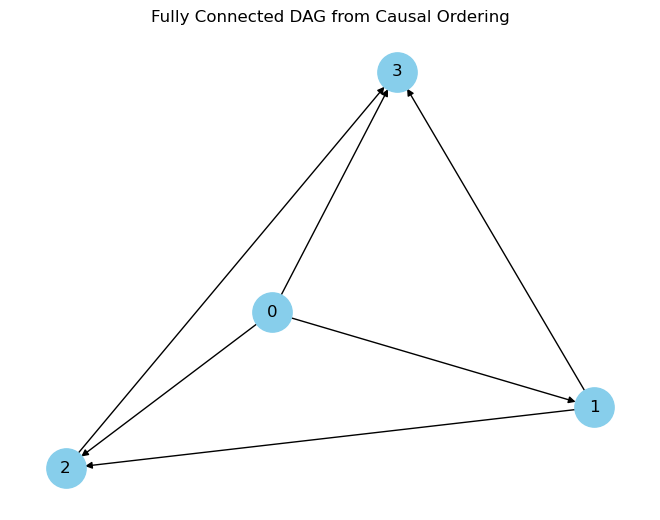

In [3]:
# Example: Return DAG from one ordering
D.ordering_to_dag(ordering=all_orderings[0], plot=True)

In [4]:
# Simulate data Y from the model using the DAG structure B 
B, Y, errors, scale = D.generate_data(B)
print(np.shape(Y))  # (n x p)

(1000, 4)


In [5]:
# Compute test tensor G
# n = number of samples
# p = number of variables
# k = 7 test functions per variable

G = compute_test_tensor_G(Y)
print(np.shape(G))  # n x k x p

(1000, 7, 4)
